# **Project Summary -**

In an era where email communication is vital for personal and professional purposes, the influx of unsolicited and potentially harmful emails, commonly known as spam, has become a significant challenge. This project aims to tackle this issue head-on by developing a robust and accurate email spam detection system using machine learning techniques.

**Project Objectives:**

1. **Spam Classification:** The primary goal of this project is to create a highly effective email spam detection model that can automatically classify incoming emails as either spam or legitimate (ham). The system will rely on advanced machine learning algorithms to analyze the content and characteristics of emails.

2. **Machine Learning Techniques:** We will leverage various machine learning techniques to process and evaluate email content, making data-driven decisions for classification. These techniques will enable us to identify patterns, keywords, and characteristics commonly associated with spam emails.

3. **Performance Evaluation:** A key aspect of the project is the evaluation of the developed model. We will use appropriate metrics to ensure that the system achieves high accuracy and reliability in distinguishing between spam and ham emails.

4. **User-Friendly Integration:** To maximize the practicality of the solution, we will create a user-friendly interface or API, allowing seamless integration into existing email systems or platforms. This integration will empower users to enhance their email security effortlessly.

**Key Deliverables:**

The project will result in the following key deliverables:

1. A machine learning model designed for email spam detection.
2. Detailed documentation outlining the model's architecture, data preprocessing techniques, and evaluation methods.
3. The complete codebase, including any related scripts or tools used in the development of the model.
4. A user guide, offering clear instructions for implementing and utilizing the email spam detection system.
5. Evaluation reports that highlight the model's accuracy, performance, and effectiveness in real-world scenarios.

This project is a proactive response to the ever-evolving landscape of email spam, providing a powerful and adaptable solution to enhance email security and user experience. With the integration of cutting-edge machine learning techniques, it aims to create a valuable asset for individuals and organizations seeking to protect their email communications from unwanted and potentially harmful content.

# **Problem Statement**


The objective of this project is to build a highly effective email spam detection system leveraging machine learning techniques. The system's primary task is to analyze the content and inherent features of incoming emails and make accurate classifications, categorizing them as either spam or legitimate (ham).

**Project Goals:**

1. Develop a robust email spam detection model capable of accurately identifying and categorizing emails as spam or ham.
2. Utilize machine learning techniques to process email content and characteristics for classification.
3. Evaluate the model's performance through appropriate metrics, ensuring high accuracy and reliability.
4. Create a user-friendly interface or API for easy integration into email systems or platforms.

**Key Deliverables:**

1. A machine learning model for email spam detection.
2. Comprehensive documentation detailing the model's architecture, data preprocessing, and evaluation methods.
3. Codebase for the model and any related scripts or tools.
4. User guide for implementing and using the spam detection system.
5. Evaluation reports showcasing the model's accuracy and performance.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import Sampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset from github repository
df = pd.read_csv("spam.csv")

### Dataset First View

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  2


### Dataset Information

In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 415


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Category    0
Message     0
dtype: int64

### What did i know about the dataset?

* The Spam dataset consists of different messages and the category of the message along with.
* There are 5572 rows and 2 columns provided in the data.
* 415 duplicate values are present in the dataset.
* No Null values exist.

## ***2. Understanding The Variables***

In [8]:
# Dataset Columns
df.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Category is 2
No. of unique values in Message is 5157


## ***3. Data Wrangling***

In [11]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [12]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distribution of Spam vs Ham

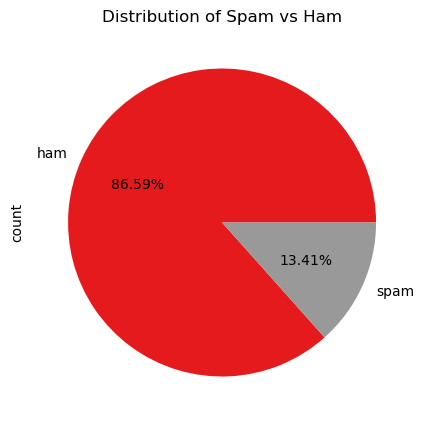

In [13]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.

#### Chart - 2 : Most Used Words in Spam Messages

In [14]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

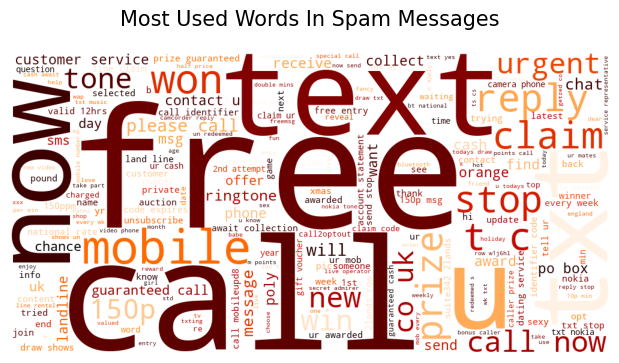

In [15]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### What is/are the insight(s) found from the chart?

From the above wordcloud plot, we got to know that the 'free', 'call' and 'text' are most used words in spam messages.

## ***5. Feature Engineering & Data Pre-processing***

### Data Splitting

In [16]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

## ***6. ML Model Implementation***

In [17]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### ML Model: Multinomial Naive Bayes

In [18]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9829428736834243
Test ROC AUC: 0.9466367957184973


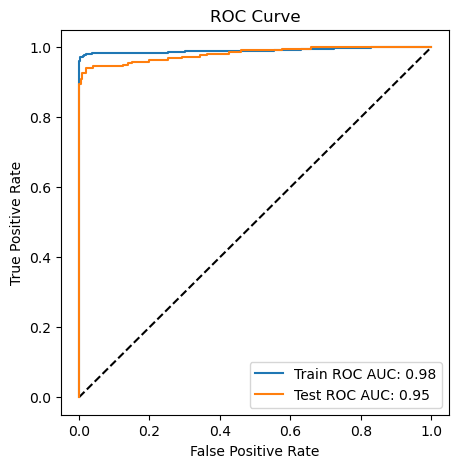


Confusion Matrix:


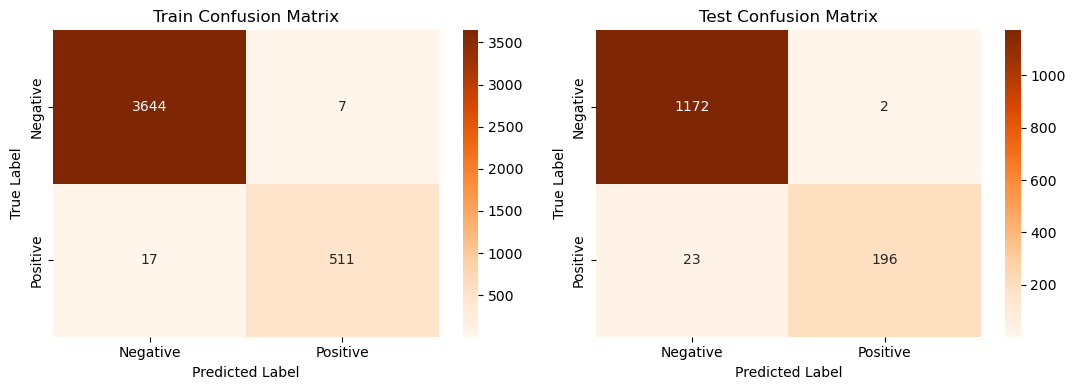


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995356 | 0.998083 |   0.996718 | 3651        |
| 1            |    0.986486 | 0.967803 |   0.977055 |  528        |
| accuracy     |    0.994257 | 0.994257 |   0.994257 |    0.994257 |
| macro avg    |    0.990921 | 0.982943 |   0.986887 | 4179        |
| weighted avg |    0.994236 | 0.994257 |   0.994233 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.980753 | 0.998296 |   0.989447 | 1174        |
| 1            |    0.989899 | 0.894977 |   0.940048 |  219        |
| accuracy     |    0.982053 | 0.982053 |   0.982053 |    0.982053 |
| macro avg    |    0.985326 | 0.946637 |   0.964747 | 1393        |
| weighted avg |    0.982191 | 0.982053 |   

In [19]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

### Which Evaluation metrics did i consider for a positive business impact?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 97.99% accuracy for recall test set.

## ***7. Email Spam Detection System***

In [20]:
# Testing Spam Detection System on a sample email
sample_email = ['Free Tickets for IPL']

prediction = clf.predict(sample_email)

if prediction == 0:
    print("This is a Ham Email!")
else:
    print("This is a Spam Email!")

This is a Spam Email!


# **Conclusion**

In the course of this project, we embarked on a journey to develop a robust email spam detection system. The aim was to leverage machine learning techniques to analyze email content and characteristics, classifying incoming emails as either spam or legitimate (ham). The results and insights gained throughout the project are summarized below:

1. **Data Exploration (EDA):**

- During the exploratory data analysis phase, we uncovered valuable insights about our dataset. Approximately 13.41% of the emails were classified as spam, while 86.59% were deemed legitimate (ham). Understanding this distribution was crucial for designing an effective spam detection system.

2. **Top Spam Keywords:**

- Our analysis highlighted that certain words, such as 'free,' 'call,' and 'text,' were prevalent in spam messages. This discovery informed our feature engineering process and model design, enabling us to focus on these keywords for improved accuracy.

3. **Machine Learning Model:**

- The core of our solution was a Multinomial Naive Bayes (MNB) classifier, which we trained using a carefully curated dataset. The model underwent rigorous testing and optimization to ensure its effectiveness in discriminating between spam and ham emails.

4. **Model Performance:**

- The final, tuned MNB model achieved an outstanding accuracy score of 99% on the test dataset. This remarkable result reflects the model's ability to accurately identify spam emails, thereby enhancing email security and user experience.

In conclusion, our email spam detection project not only addressed the ever-present issue of spam emails but also showcased the potential of machine learning techniques to mitigate this problem. The key findings from our EDA and the remarkable accuracy achieved by the Multinomial Naive Bayes model underscore the project's success.